# K-plus proches voisins (K-NN)

<img src="./figures/knn.jpg" width="700px"/>

## Diabetes Prediction

Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```


### Data Analysis
2. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```


3. Visualisez la répartition des valeurs de la variable `Outcome` à prédire:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```

### Model and Results
4. Instanciez et entraînez un **K-nearest neighbors** `KNeighborsClassifier` sur vos data:<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions sur le test set


5. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    


### Hyperparameter Tuning
7. Utilisez technique de **grid search** avec **cross validation** pour optimiser les hyperparamètres de votre K-NN.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    - Faites varier les nombre de voisins possibles de votre modèle parmi valeurs suivantes:<br>
    ```
    hyperparameters = {"n_neighbors" : range(1, 51, 2)}
    ```
    - Recalculez les prédictions sur le test set avec le meilleur modèle obtenu. Les résultats sont-il meilleurs?

## Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv('./data/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Analysis

In [5]:
# split data
X = df.drop(["Outcome"], axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [7]:
# check duplicates
X_train.duplicated().sum()

0

In [8]:
# check missing values
X_train.isna().values.sum()

0

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


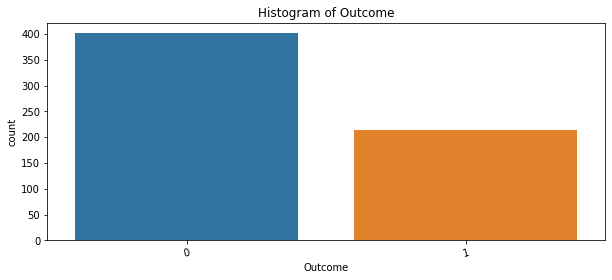

In [9]:
# histogram of Outcome variable
plt.figure(figsize=(10, 4))

plt.title('Histogram of Outcome')
sns.countplot(y_train, order=y_train.value_counts().index)
plt.xticks(rotation = 15)

plt.show()
# the target variable is imbalanced

## Model and Results

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

In [11]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



## Hyperparameter Tuning

In [12]:
hyperparameters = {"n_neighbors" : range(1, 51, 2)}

knn_opt = KNeighborsClassifier()
clf = GridSearchCV(knn_opt, hyperparameters, cv=5)
best_model = clf.fit(X_train, y_train)

In [13]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [14]:
y_test_pred = best_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



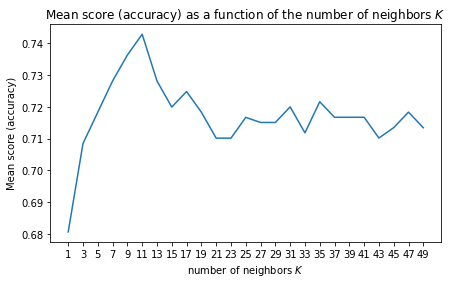

In [16]:
plt.figure(figsize=(7, 4))

x_values = range(len(best_model.cv_results_["param_n_neighbors"]))
x_labels = range(1, 51, 2)
y_values = best_model.cv_results_["mean_test_score"]

plt.plot(x_values, y_values)

plt.xticks(x_values, x_labels)
plt.xlabel("number of neighbors $K$")
plt.ylabel("Mean score (accuracy)")
plt.title("Mean score (accuracy) as a function of the number of neighbors $K$")

plt.show()

**On obtient effectivement de meilleurs résultats!**